<a href="https://colab.research.google.com/github/hepvarbifikri/istanbuldatascienceacademy/blob/main/WTWY_Lastt_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kütüphane ekleme

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
#data çekme

def get_data(date_list):
    
    mta = []
    Source_URL = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    
    for date in date_list:  
        
        url = Source_URL.format(date)
        mta.append(pd.read_csv(url))    
                   
    return pd.concat(mta)    
                   
date_list = ['190525'] 
                   
df = get_data(date_list)

In [3]:
#index resetleme 

df.reset_index(drop=True, inplace=True)

In [33]:
#data info

df.shape
df.info()
df.head(15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203363 entries, 0 to 203362
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   STATION        203363 non-null  object        
 1   DIVISION       203363 non-null  object        
 2   DATE           203363 non-null  object        
 3   TIME           203363 non-null  object        
 4   DESC           203363 non-null  object        
 5   ENTRIES        203363 non-null  int64         
 6   EXITS          203363 non-null  int64         
 7   TURNSTILE_ID   203363 non-null  object        
 8   DATE_TIME      203363 non-null  datetime64[ns]
 9   NET_ENTRIES    201535 non-null  float64       
 10  NET_EXITS      201852 non-null  float64       
 11  TOTAL_TRAFFIC  200886 non-null  float64       
 12  WEEKDAY        203363 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 29.8+ MB


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC,WEEKDAY
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24.0,3.0,27.0,Saturday
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24.0,34.0,58.0,Saturday
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98.0,86.0,184.0,Saturday
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208.0,50.0,258.0,Saturday
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262.0,34.0,296.0,Saturday
5,59 ST,BMT,05/18/2019,20:00:00,REGULAR,7063097,2393696,A002-R051-02-00-00,2019-05-18 20:00:00,183.0,23.0,206.0,Saturday
6,59 ST,BMT,05/19/2019,00:00:00,REGULAR,7063280,2393719,A002-R051-02-00-00,2019-05-19 00:00:00,28.0,6.0,34.0,Sunday
7,59 ST,BMT,05/19/2019,04:00:00,REGULAR,7063308,2393725,A002-R051-02-00-00,2019-05-19 04:00:00,8.0,19.0,27.0,Sunday
8,59 ST,BMT,05/19/2019,08:00:00,REGULAR,7063316,2393744,A002-R051-02-00-00,2019-05-19 08:00:00,77.0,49.0,126.0,Sunday
9,59 ST,BMT,05/19/2019,12:00:00,REGULAR,7063393,2393793,A002-R051-02-00-00,2019-05-19 12:00:00,199.0,44.0,243.0,Sunday


In [21]:
kontrol=df.loc[(df.DESC == 'RECOVR AUD')].head(50)
kontrol


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/20/2019,08:00:00,RECOVR AUD,7064032,2394024
48,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/18/2019,16:00:00,RECOVR AUD,6290790,1410938
58,A002,R051,02-00-01,59 ST,NQR456W,BMT,05/20/2019,08:00:00,RECOVR AUD,6291762,1411151
92,A002,R051,02-03-00,59 ST,NQR456W,BMT,05/18/2019,16:00:00,RECOVR AUD,1233934,4640293
102,A002,R051,02-03-00,59 ST,NQR456W,BMT,05/20/2019,08:00:00,RECOVR AUD,1234419,4641743
136,A002,R051,02-03-01,59 ST,NQR456W,BMT,05/18/2019,16:00:00,RECOVR AUD,1107756,1708601
146,A002,R051,02-03-01,59 ST,NQR456W,BMT,05/20/2019,08:00:00,RECOVR AUD,1109148,1710505
180,A002,R051,02-03-02,59 ST,NQR456W,BMT,05/18/2019,16:00:00,RECOVR AUD,6192212,8344730
190,A002,R051,02-03-02,59 ST,NQR456W,BMT,05/20/2019,08:00:00,RECOVR AUD,6193447,8346181


In [22]:
#kolon düzenleme

df.columns = df.columns.str.strip()
df['TURNSTILE_ID'] = df["C/A"]+ "-" + df["UNIT"] + "-" + df["SCP"]
df['DATE_TIME'] = df["DATE"] + "-" + df["TIME"]
df.drop(columns = ["LINENAME", "C/A", "UNIT", "SCP"], inplace=True)
df.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,05/18/2019-00:00:00
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,05/18/2019-04:00:00
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,05/18/2019-08:00:00
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,05/18/2019-12:00:00
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,05/18/2019-16:00:00


In [23]:
#tarih zaman formatı

df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%m/%d/%Y-%H:%M:%S')

In [24]:
#gruplama sıralama

df = df.sort_values(by=['TURNSTILE_ID','DATE_TIME','STATION'])
df.head(100)

#df.sort_values('DATE_TIME','STATION','TURNSTILE_ID', ascending=True)
# df.groupby(["STATION","TURNSTILE_ID"])
#df.head(100)

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00
...,...,...,...,...,...,...,...,...,...
95,59 ST,BMT,05/19/2019,04:00:00,REGULAR,1234153,4640697,A002-R051-02-03-00,2019-05-19 04:00:00
96,59 ST,BMT,05/19/2019,08:00:00,REGULAR,1234157,4640729,A002-R051-02-03-00,2019-05-19 08:00:00
97,59 ST,BMT,05/19/2019,12:00:00,REGULAR,1234181,4640906,A002-R051-02-03-00,2019-05-19 12:00:00
98,59 ST,BMT,05/19/2019,16:00:00,REGULAR,1234253,4641157,A002-R051-02-03-00,2019-05-19 16:00:00


In [25]:
#Net giriş hesabı

df['NET_ENTRIES'] = df['ENTRIES']


i = 1
value = len(df.TURNSTILE_ID)

for ID in range(value-1) :  
    
    if df['TURNSTILE_ID'][i] == df['TURNSTILE_ID'][i-1]:
        df['NET_ENTRIES'][i-1] = df['ENTRIES'][i]-df['ENTRIES'][i-1]
    else:
        
        df['NET_ENTRIES'][i-1] = 0
        df['NET_ENTRIES'][i] = df['ENTRIES'][i+1]-df['ENTRIES'][i]
         
    i = i+1
    
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262


In [26]:
#net çıkış hesabı

df['NET_EXITS'] = df['EXITS']

k = 1
value = len(df.TURNSTILE_ID)


for ID in range(value-1) :  
    
    if df['TURNSTILE_ID'][k] == df['TURNSTILE_ID'][k-1]:
        df['NET_EXITS'][k-1] = df['EXITS'][k]-df['EXITS'][k-1]
    else:
        
        df['NET_EXITS'][k-1] = 0
        df['NET_EXITS'][k] = df['EXITS'][k+1]-df['EXITS'][k]
        
    k = k+1
    

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24,3
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24,34
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98,86
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208,50
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262,34


In [27]:
#outlier eleme

df['NET_ENTRIES'][df['NET_ENTRIES']>10000] = np.nan
df['NET_ENTRIES'][df['NET_ENTRIES']<0] = np.nan
df['NET_EXITS'][df['NET_EXITS']>10000] = np.nan
df['NET_EXITS'][df['NET_EXITS']<0] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [192]:
print("Maximum date: ")
print(df["NET_ENTRIES"].sum())
print()
print("Minimum date: ")
print(df["NET_ENTRIES"].min())
print(df["TOTAL_TRAFFIC"].max())

Maximum date: 
35420844.0

Minimum date: 
0.0
12527.0


In [29]:
#toplam yolcu hesabı

df['TOTAL_TRAFFIC'] = df['NET_ENTRIES'] + df['NET_EXITS']

In [31]:
#gün kolonu ekleme

df['WEEKDAY'] = pd.to_datetime(df['DATE']).dt.day_name()

In [32]:
df.head()

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC,WEEKDAY
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24.0,3.0,27.0,Saturday
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24.0,34.0,58.0,Saturday
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98.0,86.0,184.0,Saturday
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208.0,50.0,258.0,Saturday
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262.0,34.0,296.0,Saturday


In [ ]:
#dataframe kayıt

df.to_csv("WTWY_MTA_Project1_data_last.csv")

In [34]:
#en kalabalık 5 istasyon

mta_top5 = df.groupby(["STATION"]).sum().sort_values(["TOTAL_TRAFFIC"],ascending=False).head(5)
mta_top5 = mta_top5.reset_index()
mta_top5


,STATION,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,34 ST-PENN STA,166574554163,176370219806,1031553.0,949208.0,1980761.0
1,GRD CNTRL-42 ST,114005666958,140699083219,866696.0,756873.0,1614863.0
2,34 ST-HERALD SQ,197182599578,247047255670,711798.0,707848.0,1391769.0
3,14 ST-UNION SQ,30286395592,15854380440,639093.0,586642.0,1225735.0
4,23 ST,243324396539,211209287781,698471.0,525706.0,1217833.0


Text(0.5, 1.0, 'Top 5 Busiest Stations')

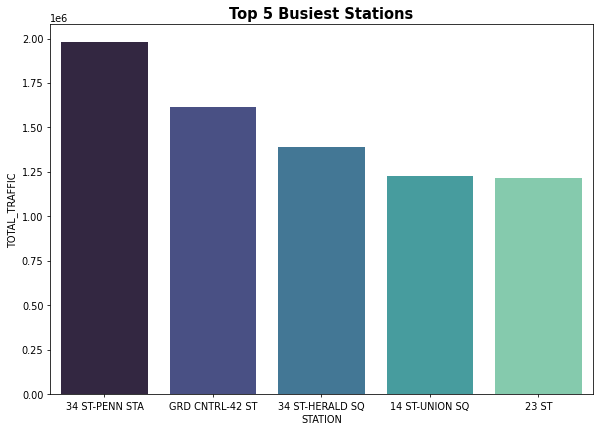

In [37]:
plt.figure(figsize=(10,7),dpi=70),
ax = sns.barplot(x="STATION", y="TOTAL_TRAFFIC", palette="mako", data=mta_top5)
plt.title("Top 5 Busiest Stations", weight="bold", c="black", fontsize=15)

In [ ]:
#station day data

data2 = df
mta_day = data2.groupby("WEEKDAY").sum().sort_values("TOTAL_TRAFFIC",ascending=False)
mta_day = mta_day.reset_index()
mta_day


,WEEKDAY,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,Tuesday,1309930332316,1071016714226,6467959.0,5072831.0,11495825.0
1,Wednesday,1219236758652,987069811762,6006637.0,4684259.0,10650196.0
2,Monday,1229275342358,1004301242225,5858563.0,4590374.0,10409075.0
3,Thursday,1238449087110,999730613688,5770072.0,4504827.0,10235747.0
4,Friday,1280643726682,1033521657754,5103800.0,3984841.0,9054953.0
5,Saturday,1210662664122,991179873161,3509637.0,2922407.0,6402375.0
6,Sunday,1219426358514,992556661531,2704176.0,2265455.0,4945498.0


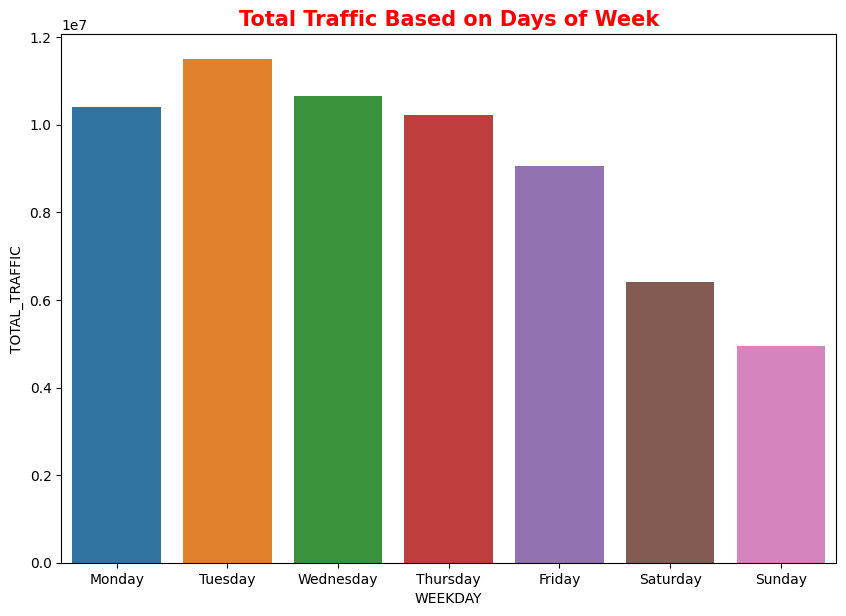

In [ ]:
#Barplot for total traffic

plt.figure(figsize=(10,7),dpi=100),
ax = sns.barplot(x="WEEKDAY",y="TOTAL_TRAFFIC",data=mta_day, order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("Total Traffic Based on Days of Week", weight="bold", c="red",fontsize=15)
plt.show()


In [41]:
#Most Busiest station by day

group = df.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum()
group = group.reset_index()

In [42]:
#Most Busiest station by day
group.sort_values(by='TOTAL_TRAFFIC')
group = group[group['STATION']=='34 ST-PENN STA']
group.head(50)

,STATION,WEEKDAY,TOTAL_TRAFFIC
425,34 ST-PENN STA,Friday,279471.0
426,34 ST-PENN STA,Monday,323732.0
427,34 ST-PENN STA,Saturday,192278.0
428,34 ST-PENN STA,Sunday,160302.0
429,34 ST-PENN STA,Thursday,342439.0
430,34 ST-PENN STA,Tuesday,342422.0
431,34 ST-PENN STA,Wednesday,340117.0


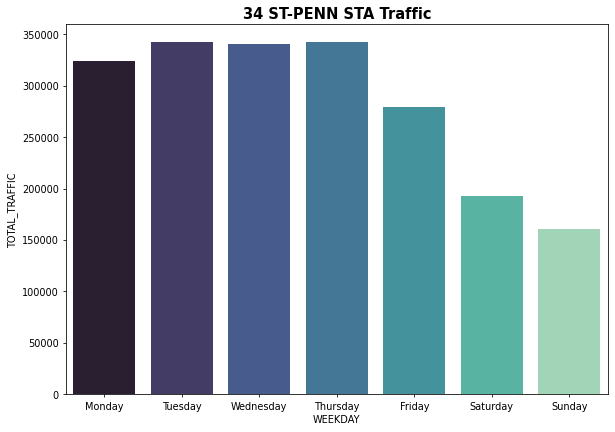

In [43]:
#Most Busiest station by day

plt.figure(figsize=(10,7),dpi=70),
bx = sns.barplot(x="WEEKDAY",y="TOTAL_TRAFFIC",data=group, palette = "mako", order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
plt.title("34 ST-PENN STA Traffic", weight="bold", c="k",fontsize=15)
plt.show()


In [ ]:
#

data3 = df

data3 = data3.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum()
data3 = data3.reset_index()
data3.head()


,STATION,WEEKDAY,TOTAL_TRAFFIC
0,1 AV,Friday,35169.0
1,1 AV,Monday,37801.0
2,1 AV,Saturday,16829.0
3,1 AV,Sunday,11623.0
4,1 AV,Thursday,41880.0


In [55]:
data4 = df

data4 = data4.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum().sort_values(ascending=False).head(100)
data4 = data4.reset_index()
data4.head(100)




,STATION,WEEKDAY,TOTAL_TRAFFIC
0,34 ST-PENN STA,Thursday,342439.0
1,34 ST-PENN STA,Tuesday,342422.0
2,34 ST-PENN STA,Wednesday,340117.0
3,34 ST-PENN STA,Monday,323732.0
4,GRD CNTRL-42 ST,Thursday,302857.0
...,...,...,...
95,CHAMBERS ST,Monday,108499.0
96,59 ST COLUMBUS,Friday,108450.0
97,FLUSHING-MAIN,Monday,108075.0
98,FLUSHING-MAIN,Thursday,105996.0


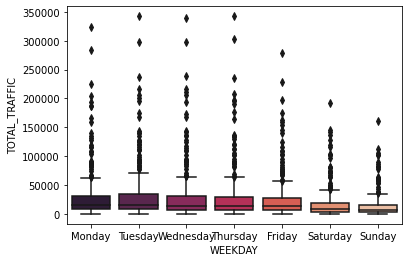

In [ ]:

sns.boxplot(x='WEEKDAY',y='TOTAL_TRAFFIC',palette="rocket", data=data3, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


Text(0.5, 1.0, 'Station Traffic > 100.000')

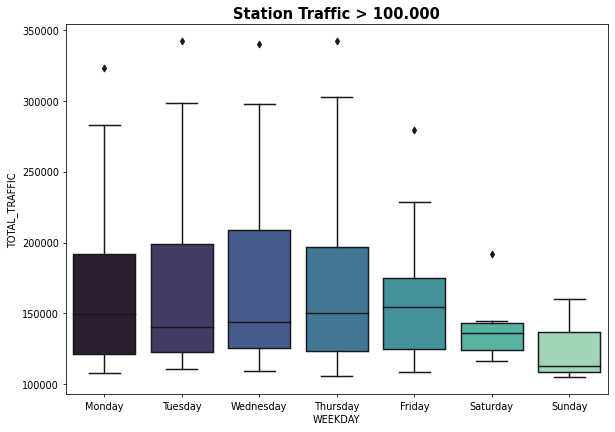

In [59]:
plt.figure(figsize=(10,7),dpi=70)
sns.boxplot(x='WEEKDAY',y='TOTAL_TRAFFIC',palette="mako", data=data4, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Station Traffic > 100.000", weight="bold", c="k",fontsize=15)

In [60]:
#en kalabalık 100 istasyon scatter

mta_top5X = df.groupby(["WEEKDAY","STATION"]).sum().sort_values(["TOTAL_TRAFFIC"],ascending=False).head(100)
mta_top5X = mta_top5X.reset_index()
mta_top5X


,WEEKDAY,STATION,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,Thursday,34 ST-PENN STA,23063291788,24318756739,180286.0,162153.0,342439.0
1,Tuesday,34 ST-PENN STA,28296319390,30518068048,180175.0,162247.0,342422.0
2,Wednesday,34 ST-PENN STA,23030368516,24288367027,178003.0,162114.0,340117.0
3,Monday,34 ST-PENN STA,23028087159,24286381510,172461.0,151271.0,323732.0
4,Thursday,GRD CNTRL-42 ST,15606775008,18913160323,163797.0,140556.0,302857.0
...,...,...,...,...,...,...,...
95,Monday,CHAMBERS ST,30146593891,26641348619,63071.0,46066.0,108499.0
96,Friday,59 ST COLUMBUS,20681456312,18006642257,57381.0,51069.0,108450.0
97,Monday,FLUSHING-MAIN,3870143897,3925929548,59043.0,49032.0,108075.0
98,Thursday,FLUSHING-MAIN,1220385282,1158628824,57881.0,48115.0,105996.0


<Figure size 700x490 with 0 Axes>

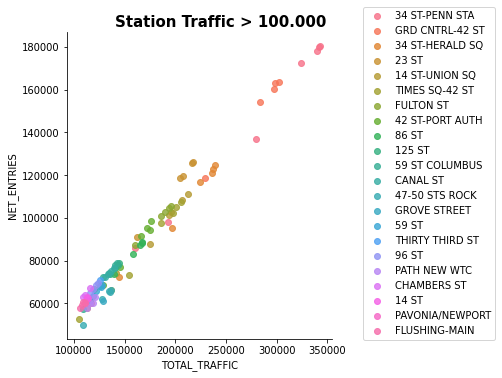

In [193]:
plt.figure(figsize=(10,7),dpi=70)
sns.lmplot( x="TOTAL_TRAFFIC", y="NET_ENTRIES", data=mta_top5X,  fit_reg=False, hue='STATION', legend=False, )
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1))
plt.title("Station Traffic > 100.000 ", weight="bold", loc="right", c="k",fontsize=15)
plt.show()


<Figure size 700x490 with 0 Axes>

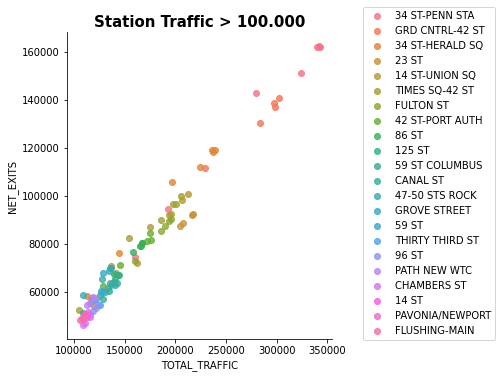

In [194]:
plt.figure(figsize=(10,7),dpi=70)
sns.lmplot( x="TOTAL_TRAFFIC", y="NET_EXITS", data=mta_top5X,  fit_reg=False, hue='STATION', legend=False, )
plt.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1))
plt.title("Station Traffic > 100.000", weight="bold", c="k",fontsize=15)
plt.show()

In [93]:
dt["WEEKNUM"] = dt.datetime["DATE_TIME"].weekday()
dt



AttributeError: ignored

In [101]:
#

sta = df.groupby(by=["STATION","WEEKDAY","TIME"]).sum().sort_values("TOTAL_TRAFFIC", ascending=False).reset_index().head(100)

sta

,STATION,WEEKDAY,TIME,ENTRIES,EXITS,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC
0,34 ST-HERALD SQ,Thursday,16:00:00,4615991140,5773129284,49739.0,34883.0,83390.0
1,34 ST-PENN STA,Wednesday,16:00:00,1875908551,1664723627,35247.0,47769.0,83016.0
2,34 ST-PENN STA,Thursday,16:00:00,1876037903,1664842890,35621.0,46124.0,81745.0
3,34 ST-HERALD SQ,Monday,16:00:00,4615650606,5772776187,49491.0,32192.0,80583.0
4,34 ST-PENN STA,Monday,16:00:00,1875656688,1664494440,34333.0,44821.0,79154.0
...,...,...,...,...,...,...,...,...
95,CHAMBERS ST,Monday,16:00:00,5024442637,4440240085,30140.0,8063.0,37847.0
96,86 ST,Thursday,16:00:00,2319454139,2544328971,19826.0,18415.0,37735.0
97,86 ST,Wednesday,16:00:00,2319393416,2544273239,20150.0,18254.0,37696.0
98,FULTON ST,Monday,17:00:00,762781919,2041682865,27777.0,9483.0,37260.0


In [102]:
sta = sns.load_dataset("sta")
sta = sta.pivot("TIME", "WEEKDAY", "TOTAL_TRAFFIC")
ax = sns.heatmap(sta)


ValueError: ignored

In [181]:
df['WEEKDAYS_INDEX'] = pd.to_datetime(df['DATE']).dt.weekday
df.head()


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC,WEEKDAY,WEEKDAYS_INDEX
0,59 ST,BMT,05/18/2019,00:00:00,REGULAR,7062481,2393489,A002-R051-02-00-00,2019-05-18 00:00:00,24.0,3.0,27.0,Saturday,5
1,59 ST,BMT,05/18/2019,04:00:00,REGULAR,7062505,2393492,A002-R051-02-00-00,2019-05-18 04:00:00,24.0,34.0,58.0,Saturday,5
2,59 ST,BMT,05/18/2019,08:00:00,REGULAR,7062529,2393526,A002-R051-02-00-00,2019-05-18 08:00:00,98.0,86.0,184.0,Saturday,5
3,59 ST,BMT,05/18/2019,12:00:00,REGULAR,7062627,2393612,A002-R051-02-00-00,2019-05-18 12:00:00,208.0,50.0,258.0,Saturday,5
4,59 ST,BMT,05/18/2019,16:00:00,RECOVR AUD,7062835,2393662,A002-R051-02-00-00,2019-05-18 16:00:00,262.0,34.0,296.0,Saturday,5


In [182]:
Most_Busiest_Station = df[df['STATION'] == '34 ST-PENN STA']
Most_Busiest_Station


,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC,WEEKDAY,WEEKDAYS_INDEX
52695,34 ST-PENN STA,IND,05/18/2019,00:00:00,REGULAR,18307,56050,N067-R012-00-00-00,2019-05-18 00:00:00,5.0,4.0,9.0,Saturday,5
52696,34 ST-PENN STA,IND,05/18/2019,04:00:00,REGULAR,18312,56054,N067-R012-00-00-00,2019-05-18 04:00:00,7.0,97.0,104.0,Saturday,5
52697,34 ST-PENN STA,IND,05/18/2019,08:00:00,REGULAR,18319,56151,N067-R012-00-00-00,2019-05-18 08:00:00,34.0,179.0,213.0,Saturday,5
52698,34 ST-PENN STA,IND,05/18/2019,12:00:00,REGULAR,18353,56330,N067-R012-00-00-00,2019-05-18 12:00:00,44.0,211.0,255.0,Saturday,5
52699,34 ST-PENN STA,IND,05/18/2019,16:00:00,REGULAR,18397,56541,N067-R012-00-00-00,2019-05-18 16:00:00,69.0,268.0,337.0,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134285,34 ST-PENN STA,IRT,05/24/2019,06:00:00,REGULAR,67861192,18344158,R142-R293-01-06-01,2019-05-24 06:00:00,114.0,394.0,508.0,Friday,4
134286,34 ST-PENN STA,IRT,05/24/2019,10:00:00,REGULAR,67861306,18344552,R142-R293-01-06-01,2019-05-24 10:00:00,181.0,329.0,510.0,Friday,4
134287,34 ST-PENN STA,IRT,05/24/2019,14:00:00,REGULAR,67861487,18344881,R142-R293-01-06-01,2019-05-24 14:00:00,230.0,380.0,610.0,Friday,4
134288,34 ST-PENN STA,IRT,05/24/2019,18:00:00,REGULAR,67861717,18345261,R142-R293-01-06-01,2019-05-24 18:00:00,125.0,204.0,329.0,Friday,4


In [183]:
for i in range(len(Most_Busiest_Station['TIME'].index)):
    
    if Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] < ('04:00:00'):
        Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] =  ('00:00 - 04:00')
    
    elif ('04:00:00') <= Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] < ('08:00:00'):
        Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] =  ('04:00 - 08:00')
    
    elif ('08:00:00') <= Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] < ('12:00:00'):
        Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] =  ('08:00 - 12:00')


    elif ('12:00:00') <= Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] < ('16:00:00'):
        Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] =  ('12:00 - 16:00')
    
    elif ('16:00:00') <= Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] < ('20:00:00'):
        Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] =  ('16:00 - 20:00')
    
    elif ('20:00:00') <= Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]]:
        Most_Busiest_Station['TIME'][Most_Busiest_Station['TIME'].index[i]] =  ('20:00 - 00:00')
        
    i = i + 1
    
Most_Busiest_Station



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lo

,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE_ID,DATE_TIME,NET_ENTRIES,NET_EXITS,TOTAL_TRAFFIC,WEEKDAY,WEEKDAYS_INDEX
52695,34 ST-PENN STA,IND,05/18/2019,00:00 - 04:00,REGULAR,18307,56050,N067-R012-00-00-00,2019-05-18 00:00:00,5.0,4.0,9.0,Saturday,5
52696,34 ST-PENN STA,IND,05/18/2019,04:00 - 08:00,REGULAR,18312,56054,N067-R012-00-00-00,2019-05-18 04:00:00,7.0,97.0,104.0,Saturday,5
52697,34 ST-PENN STA,IND,05/18/2019,08:00 - 12:00,REGULAR,18319,56151,N067-R012-00-00-00,2019-05-18 08:00:00,34.0,179.0,213.0,Saturday,5
52698,34 ST-PENN STA,IND,05/18/2019,12:00 - 16:00,REGULAR,18353,56330,N067-R012-00-00-00,2019-05-18 12:00:00,44.0,211.0,255.0,Saturday,5
52699,34 ST-PENN STA,IND,05/18/2019,16:00 - 20:00,REGULAR,18397,56541,N067-R012-00-00-00,2019-05-18 16:00:00,69.0,268.0,337.0,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134285,34 ST-PENN STA,IRT,05/24/2019,04:00 - 08:00,REGULAR,67861192,18344158,R142-R293-01-06-01,2019-05-24 06:00:00,114.0,394.0,508.0,Friday,4
134286,34 ST-PENN STA,IRT,05/24/2019,08:00 - 12:00,REGULAR,67861306,18344552,R142-R293-01-06-01,2019-05-24 10:00:00,181.0,329.0,510.0,Friday,4
134287,34 ST-PENN STA,IRT,05/24/2019,12:00 - 16:00,REGULAR,67861487,18344881,R142-R293-01-06-01,2019-05-24 14:00:00,230.0,380.0,610.0,Friday,4
134288,34 ST-PENN STA,IRT,05/24/2019,16:00 - 20:00,REGULAR,67861717,18345261,R142-R293-01-06-01,2019-05-24 18:00:00,125.0,204.0,329.0,Friday,4


In [184]:
sta34 = Most_Busiest_Station.groupby(["TIME","WEEKDAY","WEEKDAYS_INDEX"]).agg({'TOTAL_TRAFFIC':'sum'}).reset_index()[["TIME","WEEKDAY","TOTAL_TRAFFIC","WEEKDAYS_INDEX"]]
sta34



,TIME,WEEKDAY,TOTAL_TRAFFIC,WEEKDAYS_INDEX
0,00:00 - 04:00,Friday,4272.0,4
1,00:00 - 04:00,Monday,3732.0,0
2,00:00 - 04:00,Saturday,5428.0,5
3,00:00 - 04:00,Sunday,5524.0,6
4,00:00 - 04:00,Thursday,4160.0,3
5,00:00 - 04:00,Tuesday,4047.0,1
6,00:00 - 04:00,Wednesday,4472.0,2
7,04:00 - 08:00,Friday,44859.0,4
8,04:00 - 08:00,Monday,54736.0,0
9,04:00 - 08:00,Saturday,15100.0,5


Text(0.5, 1.0, 'Traffic For 34 ST-PENN STATION')

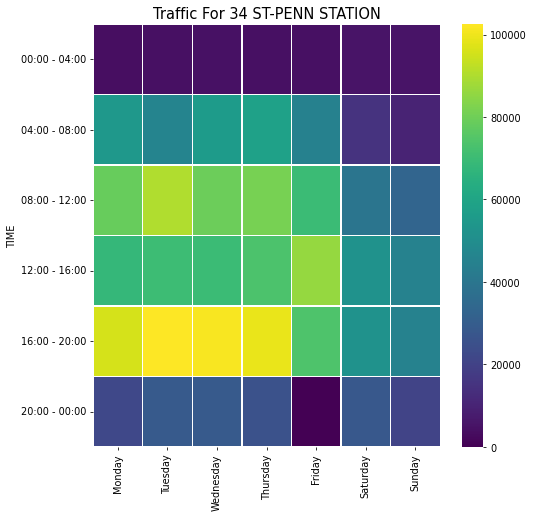

In [188]:
plt.figure(figsize=(8,8),dpi=70)

pen34= sta34.pivot("TIME", "WEEKDAYS_INDEX", "TOTAL_TRAFFIC")
pen34.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax = sns.heatmap(pen34, linewidths=0.4, cmap="viridis")

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.title("Traffic For 34 ST-PENN STATION",fontsize = 15,loc='center',color='Black')


In [174]:
matrix_station = group_station.unstack()
matrix_station

WEEKDAY                   Friday   Monday  Saturday   Sunday  Thursday  \
STATION        TIME                                                      
34 ST-PENN STA 00:00:00   2761.0   2333.0    4250.0   4664.0    2782.0   
               02:00:00   1511.0   1399.0    1178.0    860.0    1378.0   
               04:00:00  22717.0  26774.0    7195.0   4553.0   28520.0   
               06:00:00  22142.0  27962.0    7905.0   5440.0   29935.0   
               08:00:00  41037.0  63985.0   25273.0  21103.0   52865.0   
               08:08:30      NaN      NaN       NaN      NaN   12902.0   
               08:39:56   8091.0      NaN       NaN      NaN       NaN   
               08:40:00    651.0      NaN       NaN      NaN       NaN   
               08:47:39      NaN      NaN       NaN      NaN       NaN   
               08:48:59      NaN      NaN       NaN      NaN       NaN   
               08:50:23      NaN      NaN       NaN      NaN       NaN   
               08:51:43      NaN      NaN       NaN      NaN       NaN   
               09:09:39   2685.0      NaN       NaN      NaN       NaN   
               10:00:00  17281.0  14876.0   14398.0  11918.0   15597.0   
               12:00:00  59285.0  41376.0   36335.0  31475.0   44907.0   
               14:00:00  27241.0  26746.0   15904.0  14151.0   28573.0   
               16:00:00  60426.0  79154.0   38847.0  33775.0   81745.0   
               16:06:31      NaN      NaN       NaN      NaN       NaN   
               16:06:36      NaN      NaN       NaN      NaN       NaN   
               16:07:58      NaN      NaN       NaN      NaN       NaN   
               18:00:00  13643.0  16744.0   13033.0  11532.0   17557.0   
               20:00:00      0.0  18803.0   21942.0  16761.0   21461.0   
               22:00:00      0.0   3580.0    6018.0   4070.0    4217.0   

WEEKDAY                  Tuesday  Wednesday  
STATION        TIME                          
34 ST-PENN STA 00:00:00   2574.0     2992.0  
               02:00:00   1473.0     1480.0  
               04:00:00  27441.0    27228.0  
               06:00:00  18901.0    28524.0  
               08:00:00  65301.0    64126.0  
               08:08:30      NaN        NaN  
               08:39:56      NaN        NaN  
               08:40:00      NaN        NaN  
               08:47:39    235.0        NaN  
               08:48:59   7580.0        NaN  
               08:50:23     60.0        NaN  
               08:51:43   1795.0        NaN  
               09:09:39      NaN        NaN  
               10:00:00  15529.0    15567.0  
               12:00:00  42742.0    42558.0  
               14:00:00  27539.0    27472.0  
               16:00:00  54255.0    83016.0  
               16:06:31  15701.0        NaN  
               16:06:36   5176.0        NaN  
               16:07:58   9154.0        NaN  
               18:00:00  18285.0    18560.0  
               20:00:00  23845.0    23623.0  
               22:00:00   4836.0     4971.0

In [175]:
matrix_station.reset_index()
matrix_station

WEEKDAY                   Friday   Monday  Saturday   Sunday  Thursday  \
STATION        TIME                                                      
34 ST-PENN STA 00:00:00   2761.0   2333.0    4250.0   4664.0    2782.0   
               02:00:00   1511.0   1399.0    1178.0    860.0    1378.0   
               04:00:00  22717.0  26774.0    7195.0   4553.0   28520.0   
               06:00:00  22142.0  27962.0    7905.0   5440.0   29935.0   
               08:00:00  41037.0  63985.0   25273.0  21103.0   52865.0   
               08:08:30      NaN      NaN       NaN      NaN   12902.0   
               08:39:56   8091.0      NaN       NaN      NaN       NaN   
               08:40:00    651.0      NaN       NaN      NaN       NaN   
               08:47:39      NaN      NaN       NaN      NaN       NaN   
               08:48:59      NaN      NaN       NaN      NaN       NaN   
               08:50:23      NaN      NaN       NaN      NaN       NaN   
               08:51:43      NaN      NaN       NaN      NaN       NaN   
               09:09:39   2685.0      NaN       NaN      NaN       NaN   
               10:00:00  17281.0  14876.0   14398.0  11918.0   15597.0   
               12:00:00  59285.0  41376.0   36335.0  31475.0   44907.0   
               14:00:00  27241.0  26746.0   15904.0  14151.0   28573.0   
               16:00:00  60426.0  79154.0   38847.0  33775.0   81745.0   
               16:06:31      NaN      NaN       NaN      NaN       NaN   
               16:06:36      NaN      NaN       NaN      NaN       NaN   
               16:07:58      NaN      NaN       NaN      NaN       NaN   
               18:00:00  13643.0  16744.0   13033.0  11532.0   17557.0   
               20:00:00      0.0  18803.0   21942.0  16761.0   21461.0   
               22:00:00      0.0   3580.0    6018.0   4070.0    4217.0   

WEEKDAY                  Tuesday  Wednesday  
STATION        TIME                          
34 ST-PENN STA 00:00:00   2574.0     2992.0  
               02:00:00   1473.0     1480.0  
               04:00:00  27441.0    27228.0  
               06:00:00  18901.0    28524.0  
               08:00:00  65301.0    64126.0  
               08:08:30      NaN        NaN  
               08:39:56      NaN        NaN  
               08:40:00      NaN        NaN  
               08:47:39    235.0        NaN  
               08:48:59   7580.0        NaN  
               08:50:23     60.0        NaN  
               08:51:43   1795.0        NaN  
               09:09:39      NaN        NaN  
               10:00:00  15529.0    15567.0  
               12:00:00  42742.0    42558.0  
               14:00:00  27539.0    27472.0  
               16:00:00  54255.0    83016.0  
               16:06:31  15701.0        NaN  
               16:06:36   5176.0        NaN  
               16:07:58   9154.0        NaN  
               18:00:00  18285.0    18560.0  
               20:00:00  23845.0    23623.0  
               22:00:00   4836.0     4971.0

In [176]:

matrix_station = matrix_station.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station = matrix_station.reindex(index=list(group_station.head(10).index))
matrix_station


WEEKDAY                   Monday  Tuesday  Wednesday  Thursday   Friday  \
STATION        TIME                                                       
34 ST-PENN STA 16:00:00  79154.0  54255.0    83016.0   81745.0  60426.0   
               16:00:00  79154.0  54255.0    83016.0   81745.0  60426.0   
               16:00:00  79154.0  54255.0    83016.0   81745.0  60426.0   
               08:00:00  63985.0  65301.0    64126.0   52865.0  41037.0   
               08:00:00  63985.0  65301.0    64126.0   52865.0  41037.0   
               08:00:00  63985.0  65301.0    64126.0   52865.0  41037.0   
               16:00:00  79154.0  54255.0    83016.0   81745.0  60426.0   
               12:00:00  41376.0  42742.0    42558.0   44907.0  59285.0   
               16:00:00  79154.0  54255.0    83016.0   81745.0  60426.0   
               08:00:00  63985.0  65301.0    64126.0   52865.0  41037.0   

WEEKDAY                  Saturday   Sunday  
STATION        TIME                         
34 ST-PENN STA 16:00:00   38847.0  33775.0  
               16:00:00   38847.0  33775.0  
               16:00:00   38847.0  33775.0  
               08:00:00   25273.0  21103.0  
               08:00:00   25273.0  21103.0  
               08:00:00   25273.0  21103.0  
               16:00:00   38847.0  33775.0  
               12:00:00   36335.0  31475.0  
               16:00:00   38847.0  33775.0  
               08:00:00   25273.0  21103.0

Text(0.5, 1.0, 'Stations Traffic in the Week')

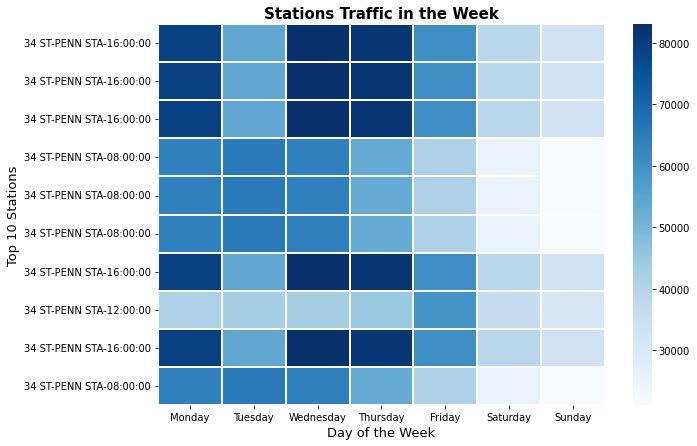

In [177]:
fig2 = plt.figure(figsize=[10,7])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax2 = sns.heatmap(matrix_station,cmap='Blues',linecolor='white',linewidths=1,fmt='')
plt.xlabel('Day of the Week',fontsize=13)
plt.ylabel('Top 10 Stations',fontsize=13)   
plt.title('Stations Traffic in the Week',weight='bold',fontsize=15)


In [ ]:
#penn_time = df.groupby("STATION","WEEKDAY").sum().sort_values("TOTAL_TRAFFIC", ascending=False).head(20)



penn_time = df.groupby(['WEEKDAY', 'TIME'])['TOTAL_TRAFFIC'].sum().round().reset_index()

penn_hm = penn_time.pivot(index=["TIME"], columns=['WEEKDAY'], values='TOTAL_TRAFFIC').head(20)


([<matplotlib.axis.YTick at 0x7f379d51c9d0>,
 [Text(0, 0.5, '00:00'),
  Text(0, 1.5, '04:00'),
  Text(0, 2.5, '08:00'),
  Text(0, 3.5, '12:00'),
  Text(0, 4.5, '16:00'),
  Text(0, 5.5, '20:00'),
  Text(0, 6.5, '00:00')])

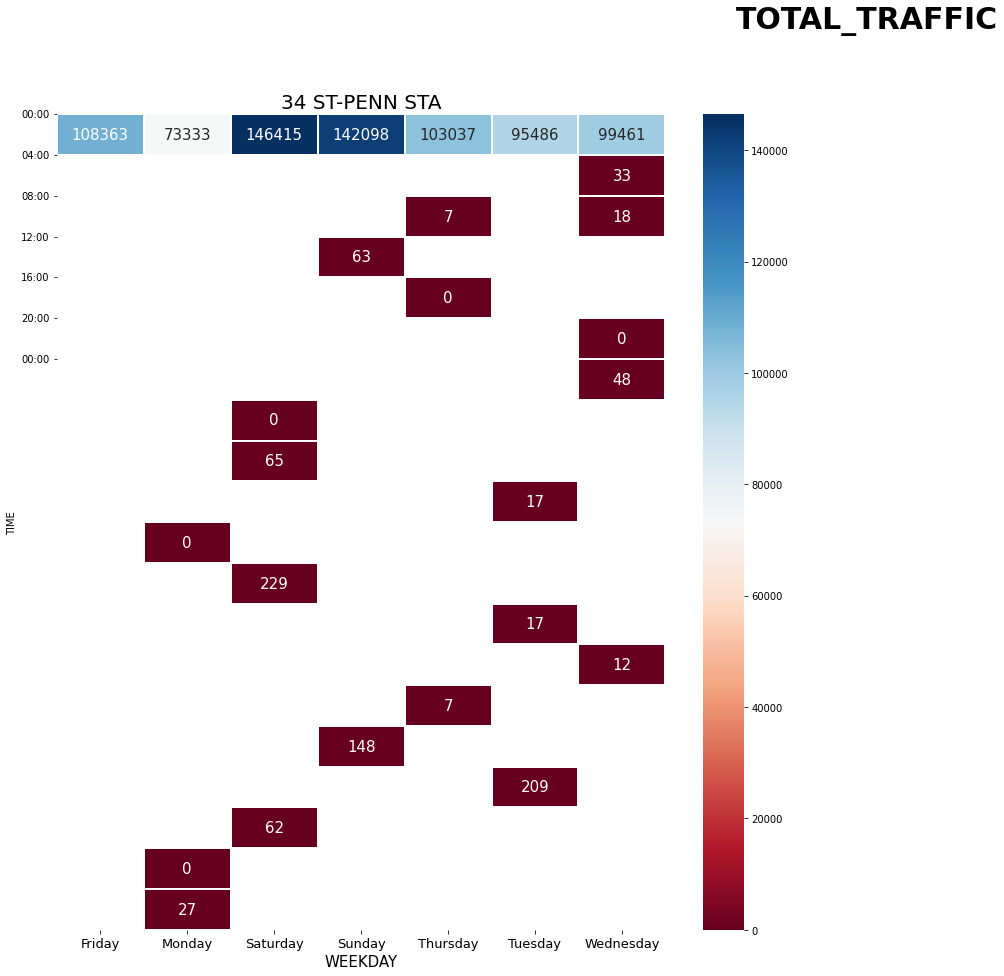

In [ ]:
plt.figure(figsize=[30,15])
plt.suptitle("TOTAL_TRAFFIC", size=30, weight='bold')
plt.subplot(1,2,1)
sns.heatmap(penn_hm, cmap='RdBu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":15})
plt.title("34 ST-PENN STA", size=20)
plt.xlabel("WEEKDAY", size=15)
plt.xticks(size=13)
plt.yticks([0,1,2,3,4,5,6],["00:00","04:00","08:00","12:00","16:00","20:00","00:00"])

In [ ]:
#dattaa = df.groupby("STATION").sum().sort_values(by=["TOTAL_TRAFFIC"]).head(100)
dattaa = df.groupby(['WEEKDAY', 'TIME'])['TOTAL_TRAFFIC'].sum().round().reset_index()
dattaa

,WEEKDAY,TIME,TOTAL_TRAFFIC
0,Friday,00:00:00,108363.0
1,Friday,00:05:12,20.0
2,Friday,00:13:38,60.0
3,Friday,00:14:49,42.0
4,Friday,00:15:50,3.0
...,...,...,...
10154,Wednesday,23:51:34,67.0
10155,Wednesday,23:52:25,25.0
10156,Wednesday,23:57:23,0.0
10157,Wednesday,23:59:07,1.0


In [ ]:
mta_top1_heatmap_detail = dattaa.groupby(["WEEKDAY","STATION"])
mta_top1_heatmap_detail = mta_top1_heatmap_detail["TOTAL_TRAFFIC"].mean().reset_index()

mta_top1_heatmap_detail = dattaa.pivot(index="STATION", columns="WEEKDAY",values="TOTAL_TRAFFIC")
mta_top1_heatmap_detail = mta_top1_heatmap_detail[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]]

#Heatmap for top7 stations per day

plt.figure(figsize=(15,8),dpi=200),
sns.set(font_scale=1)
sns.heatmap(mta_top1_heatmap_detail,annot=False, linewidths=2, cbar_kws={'label': 'Total Traffic'})
plt.style.use('seaborn-talk')
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0)

plt.xticks(weight="bold",rotation=0)
plt.title("Busiest Day and Time for 34 ST-PENN Station",weight="bold",c="red", fontsize=15)
ax.xaxis.get_majorticklabels()[2].set_x(-.5)



KeyError: ignored

In [ ]:
group_station_day = df.groupby(['STATION','WEEKDAY'])['TOTAL_TRAFFIC'].sum()

group_station_day

STATION    WEEKDAY  
1 AV       Friday       35169.0
           Monday       37801.0
           Saturday     16829.0
           Sunday       11623.0
           Thursday     41880.0
                         ...   
ZEREGA AV  Saturday      1789.0
           Sunday        1196.0
           Thursday      5316.0
           Tuesday       5516.0
           Wednesday     5553.0
Name: TOTAL_TRAFFIC, Length: 2638, dtype: float64

In [ ]:

matrix_station_day = group_station_day.unstack()


matrix_station_day


WEEKDAY,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
STATION,,,,,,,
1 AV,35169.0,37801.0,16829.0,11623.0,41880.0,40717.0,41489.0
103 ST,48740.0,53227.0,35534.0,28845.0,54123.0,55964.0,56042.0
103 ST-CORONA,31915.0,34845.0,19048.0,14494.0,35872.0,35942.0,36429.0
104 ST,4835.0,5609.0,1474.0,1013.0,5235.0,5654.0,5516.0
110 ST,18843.0,20597.0,13343.0,10334.0,20925.0,21571.0,21930.0
...,...,...,...,...,...,...,...
WOODLAWN,7893.0,8530.0,6209.0,4793.0,8393.0,9146.0,9002.0
WORLD TRADE CTR,29739.0,34208.0,14238.0,11266.0,35323.0,36228.0,35039.0
WTC-CORTLANDT,20475.0,23762.0,11633.0,8914.0,24867.0,24797.0,24406.0


In [ ]:
matrix_station_day.reset_index()
matrix_station_day = matrix_station_day.reindex(columns=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
matrix_station_day = matrix_station_day.reindex(index=list(group_station_day.head(10).index))



/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


Text(0.5, 1.0, 'Station Traffic in the Week')

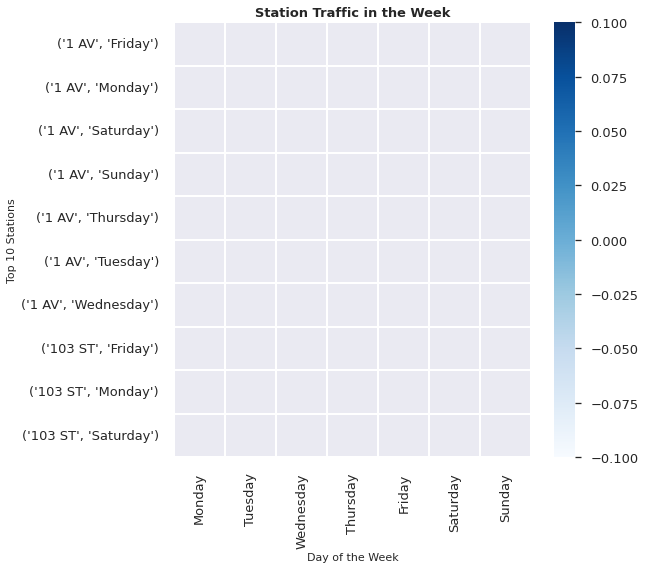

In [ ]:

fig2 = plt.figure(figsize=[8,8])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax2 = sns.heatmap(matrix_station_day,cmap='Blues',linecolor='white',linewidths=1,fmt='')

plt.xlabel('Day of the Week',fontsize=11)
plt.ylabel('Top 10 Stations',fontsize=11)   
plt.title('Station Traffic in the Week',weight='bold',fontsize=13)
